In [ ]:
#NEwspaper documentation: https://newspaper.readthedocs.io/en/latest/

In [2]:
from tqdm import tqdm
import newspaper
from newspaper import Article
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date

In [3]:
today = date.today().day

In [15]:
#Looping for 14  days to get website object for last 2 weeks
website = []
for i in tqdm(range(today-14,today)):
    temp = newspaper.build("https://www.prnewswire.com/news-releases/news-releases-list/?page=1&pagesize=100&month=11&day=" + str(i)+ "&year=2021&hour=00",memoize_articles = False)
    website.append(temp)

In [17]:
#Try expect because some artices return 404 error, which stops the entire code
articles = []
for day in website:
    for i in tqdm(range(len(day.articles))):
        try:
            article = day.articles[i]
            article.download()
            article.parse()
            articles.append(article)
        except:
            pass

100%|██████████| 120/120 [01:03<00:00,  1.88it/s]


In [32]:
#Get the title,id,keyword,text and publishing date from each article
article_title = []
article_text = []
article_keywords = []
article_url = []
artical_publish_date = []
for article in tqdm(articles):
    article.nlp()
    artical_publish_date.append(article.publish_date)
    article_keywords.append(article.keywords)
    article_title.append(article.title)
    article_text.append(article.text)
    article_url.append(article.url)

100%|██████████| 1511/1511 [00:03<00:00, 388.67it/s]


In [39]:
#Store all the data into a dataframe
data = pd.DataFrame({"Article_Title": article_title,"Article_id": articles,"Keyword": article_keywords,"Article_Text": article_text,"Publish Date": artical_publish_date,"Url":article_url})

In [40]:
data

,Article_Title,Article_id,Keyword,Article_Text,Publish Date,Url
0,Internet of Things News and Press Releases fro...,<newspaper.article.Article object at 0x000002A...,"[submit, internet, things, free, sources, pres...","Journalists and Bloggers\n\nThe news you need,...",None,https://www.prnewswire.com/news-releases/consu...
1,All Heavy Industry & Manufacturing News and Pr...,<newspaper.article.Article object at 0x000002A...,"[submit, heavy, free, sources, press, request,...","Journalists and Bloggers\n\nThe news you need,...",None,https://www.prnewswire.com/news-releases/heavy...
2,"All Machine Tools, Metalworking and Metallurgy...",<newspaper.article.Article object at 0x000002A...,"[metallurgy, machine, submit, free, sources, p...","Journalists and Bloggers\n\nThe news you need,...",None,https://www.prnewswire.com/news-releases/heavy...
3,All Consumer Products & Retail News and Press ...,<newspaper.article.Article object at 0x000002A...,"[submit, free, sources, press, request, pr, ne...","Journalists and Bloggers\n\nThe news you need,...",None,https://www.prnewswire.com/news-releases/consu...
4,All Amusement Parks and Tourist Attractions Ne...,<newspaper.article.Article object at 0x000002A...,"[submit, free, sources, press, request, amusem...","Journalists and Bloggers\n\nThe news you need,...",None,https://www.prnewswire.com/news-releases/trave...
...,...,...,...,...,...,...
1506,online-discoverability-survival-kit-for-small-...,<newspaper.article.Article object at 0x000002A...,"[online, build, press, facebook, search, keywo...",ONLINE DISCOVERABILITY SURVIVAL KIT FOR SMALL ...,None,https://www.prnewswire.com/resources/white-pap...
1507,Intermedia Boosts Campaign Visibility with Awa...,<newspaper.article.Article object at 0x000002A...,"[case, intermedia, boosts, study, video, secur...",CHALLENGE\n\nGarnering awareness for primary r...,None,https://www.prnewswire.com/resources/case-stud...
1508,OpenTable Sparks Engagement with Road Trip-The...,<newspaper.article.Article object at 0x000002A...,"[unique, travellers, useful, visual, triptheme...",CHALLENGE\n\nHooking a New Audience with Compe...,None,https://www.prnewswire.com/resources/case-stud...
1509,St. Baldrick's Changes Narrative Surrounding C...,<newspaper.article.Article object at 0x000002A...,"[key, baldricks, surrounding, childhood, cance...",St. Baldrick’s worked to craft content that te...,None,https://www.prnewswire.com/resources/case-stud...


In [11]:
#Dropping duplicates if any
data.drop_duplicates(subset = "Article_Text",inplace = True,ignore_index = True)

In [41]:
#NOT FOUND: TSLA,SHOP,BAMA,CNR,ENB,BNS,TRI,BMO,CP,CNQ,TRP,BCE,NTR,AAPL,CSU,MFU,ABX
#GM:General Motors
#RY: Royal Bank of Canada
#TD: TD Bank
#SU: Suncor Energy
#CM: CIBC


names = ["GM","RY","TD","SU","CM"]
tickers = {i:[] for i in names}
for i in range(len(data)):
    for name in names:
        if name in data.iloc[i]["Article_Text"]:
            tickers[name].append(i)

In [42]:
#Dictionary of lists where each list stores the index of the dataframe where the ticker is found 
tickers

{'GM': [25,
  26,
  133,
  134,
  241,
  242,
  349,
  350,
  457,
  458,
  564,
  565,
  672,
  673,
  780,
  781,
  888,
  889,
  996,
  997,
  1104,
  1105,
  1212,
  1213,
  1320,
  1321,
  1428,
  1429],
 'RY': [13,
  14,
  80,
  121,
  122,
  188,
  229,
  230,
  296,
  337,
  338,
  404,
  445,
  446,
  511,
  552,
  553,
  619,
  660,
  661,
  727,
  768,
  769,
  835,
  876,
  877,
  943,
  984,
  985,
  1051,
  1092,
  1093,
  1159,
  1200,
  1201,
  1267,
  1308,
  1309,
  1375,
  1416,
  1417,
  1483],
 'TD': [35,
  82,
  143,
  190,
  251,
  298,
  359,
  406,
  467,
  513,
  574,
  621,
  682,
  729,
  790,
  837,
  898,
  945,
  1006,
  1053,
  1114,
  1161,
  1222,
  1269,
  1330,
  1377,
  1438,
  1485],
 'SU': [10,
  13,
  14,
  23,
  27,
  50,
  59,
  81,
  103,
  118,
  121,
  122,
  131,
  135,
  158,
  167,
  189,
  211,
  226,
  229,
  230,
  239,
  243,
  266,
  275,
  297,
  319,
  334,
  337,
  338,
  347,
  351,
  374,
  383,
  405,
  427,
  442,
  445,
  446

In [43]:
stock = {}
for name in names:
    temp = yf.Ticker(name)
    stock[name] = temp.history(period = "YTD")

In [44]:
#Dictionary of dataframes where each dataframe stores the financial data of the corresponding ticker
stock["GM"]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04,41.950001,42.119999,40.139999,40.509998,15768100,0,0
2021-01-05,40.060001,41.840000,40.040001,41.660000,18045800,0,0
2021-01-06,41.919998,43.849998,41.860001,42.980000,22694900,0,0
2021-01-07,43.980000,43.980000,42.959999,43.320000,13625700,0,0
2021-01-08,43.310001,43.490002,42.320000,43.060001,18426200,0,0
...,...,...,...,...,...,...,...
2021-11-15,63.660000,63.730000,62.630001,62.970001,14372100,0,0
2021-11-16,63.240002,63.279999,61.930000,62.610001,16115000,0,0
2021-11-17,63.330002,65.070000,62.380001,64.610001,29983400,0,0


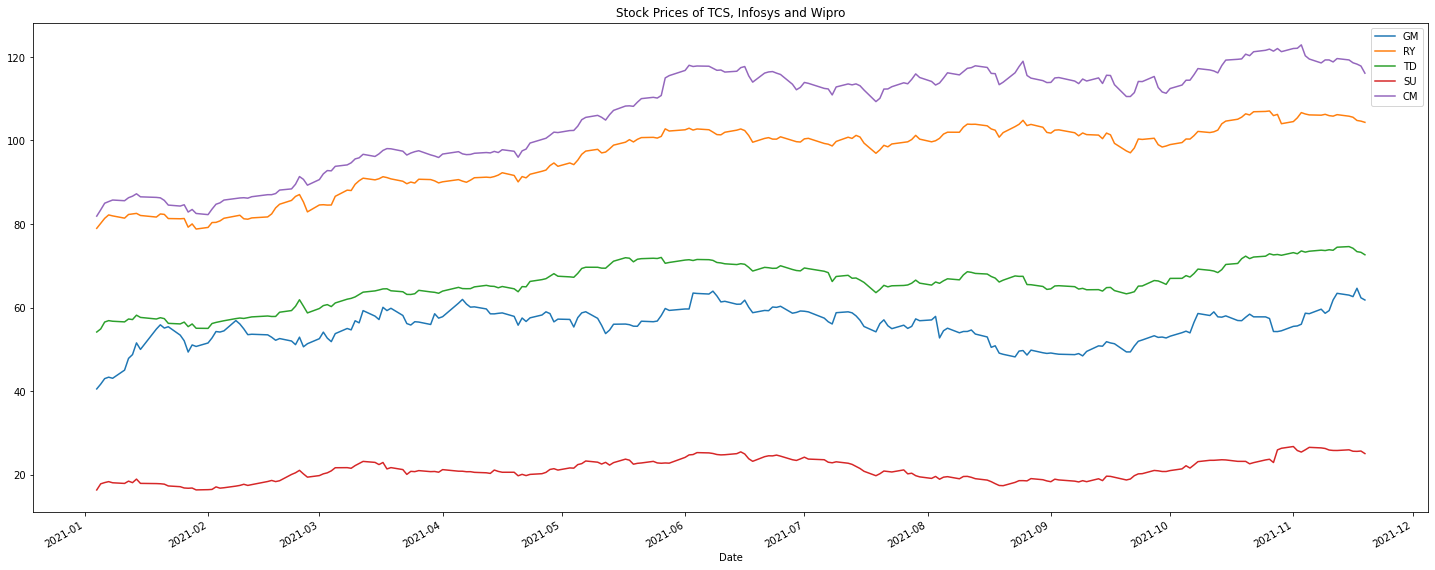

In [45]:
stock["GM"]['Close'].plot(label = 'GM', figsize = (25,10))
stock["RY"]['Close'].plot(label = 'RY', )
stock["TD"]['Close'].plot(label = 'TD', )
stock["SU"]['Close'].plot(label = 'SU', )
stock["CM"]['Close'].plot(label = 'CM', )
plt.title('Stock Prices of TCS, Infosys and Wipro')
plt.legend()

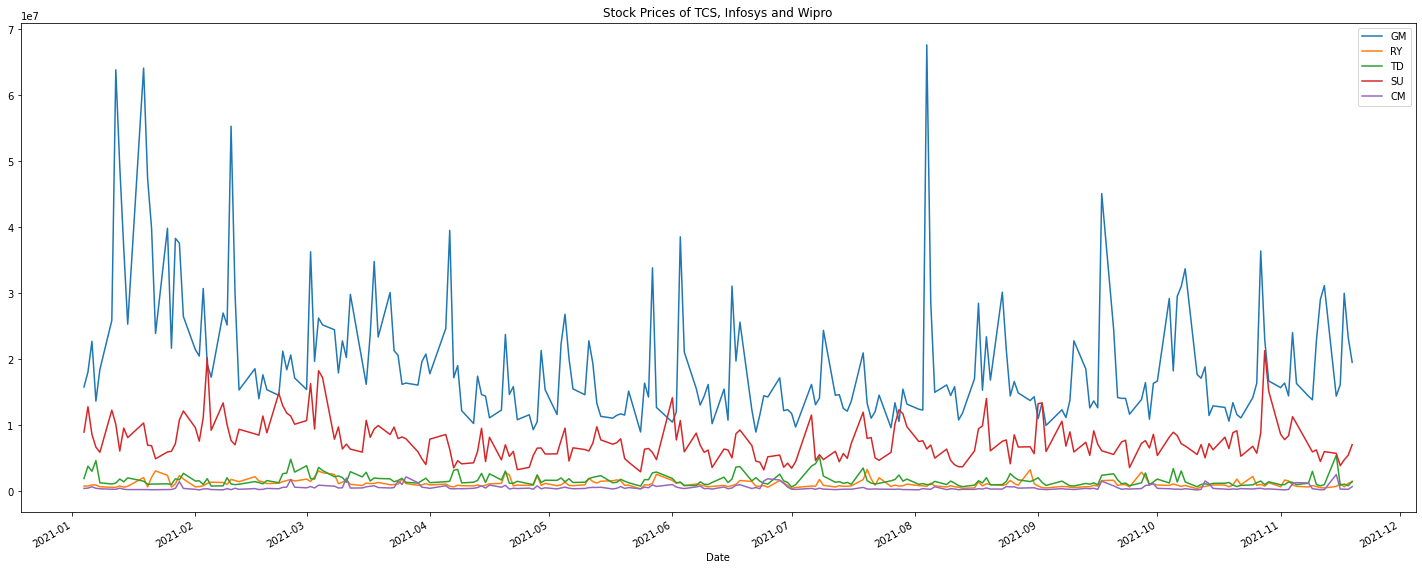

In [46]:
stock["GM"]['Volume'].plot(label = 'GM', figsize = (25,10))
stock["RY"]['Volume'].plot(label = 'RY', )
stock["TD"]['Volume'].plot(label = 'TD', )
stock["SU"]['Volume'].plot(label = 'SU', )
stock["CM"]['Volume'].plot(label = 'CM', )
plt.title('Stock Prices of TCS, Infosys and Wipro')
plt.legend()